In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = '/mnt/c/Users/tsimk/Downloads/dotfiles'
msk_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_clrd0000.gl5'
pop_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
ara_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/lnd_ara_/lndara.CAMA.gl5'
msk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
ara = np.fromfile(ara_path, dtype='float32').reshape(2160, 4320)
print(np.min(pop))
print(np.max(pop))
print(np.min(ara))
print(np.max(ara))

0.0
3374081.0
9583888.0
1e+20


In [3]:
density = (pop / (ara/10**6))
density_masked = np.ma.masked_where(ara == 1e20, density)
print(np.min(density))
print(np.max(density))

ara_masked = np.ma.masked_where(ara == 1e20, ara)
print(np.min(ara_masked)) # m2 = km2(1e6) 北極とかで9km2くらい
print(np.max(ara_masked)) # 赤道で85km2くらい

0.0
45522.528334462695
9583888.0
85479624.0


In [36]:
city_num = 8
tmp = np.ma.masked_where(msk!=city_num, density_masked)
ppp = np.ma.masked_where(msk!=city_num, pop).compressed()
aaa = np.ma.masked_where(msk!=city_num, ara).compressed()
mask = aaa != 1e20  # 1e20以外の要素を選択
nonmask_mean = np.mean(aaa[mask])  # マスクされた要素の平均
aaa = np.where(aaa == 1e20, nonmask_mean, aaa)  # 1e20を平均値に置き換える
grid_num = np.sum(np.where(msk==city_num, 1, 0))
valid_values = tmp.compressed()
count_below_1500 = np.sum(valid_values < 1500)

coord = np.where((~tmp.mask) & (tmp < 1500))
ara_below_1500 = np.sum(ara[coord])/1e6 # km2
pop_below_1500 = np.sum(pop[coord]) # person
coord = np.where((~tmp.mask) & (tmp >= 1500))
pop_above_1500 = np.sum(pop[coord]) # person
rate = count_below_1500/grid_num # %
mean = np.sum(ppp)/(np.sum(aaa)/10**6)

print(np.min(valid_values))
print(np.max(valid_values))
print(np.mean(valid_values))
print(mean)
print(f'grid_num: {grid_num}')
print(f"1500未満のグリッド数: {count_below_1500}")
print(f'popbelow: {pop_below_1500}')
print(f'popabove: {pop_above_1500}')
print(f'rate_of_grid_below_1500person_per_square_kilometer: {rate}')
print(f'aradiff: {ara_below_1500}') #km2

7512.829200707752
31787.204162962767
16612.45206475226
15337.340845050867
grid_num: 13
1500未満のグリッド数: 0
popbelow: 0.0
popabove: 14772398.0
rate_of_grid_below_1500person_per_square_kilometer: 0.0
aradiff: 0.0


In [ ]:
grid_list = []
lower_list = []
rate_list = []
aradiff_list = []
popdiff_list = []

for city_num in range(1, 1861):
    grid_num = np.sum(np.where(msk==city_num, 1, 0))
    if grid_num > 0:
        city_density = np.ma.masked_where(msk!=city_num, density_masked)
        valid_citydensity = city_density.compressed()
        count_below_1500 = np.sum(valid_citydensity < 1500)
        
        coord = np.where((~city_density.mask) & (city_density < 1500))
        ara_below_1500 = np.sum(ara[coord])/1e6 # km2
        pop_below_1500 = np.sum(pop[coord]) # person
        rate = count_below_1500/grid_num # %
        
        print(f'max: {np.min(city_density)}')
        print(f'min: {np.max(city_density)}')
        print(f'grid_num: {grid_num}')
        print(f"1500未満のグリッド数: {count_below_1500}")
        print(f'popdiff: {pop_below_1500}')
        print(f'rate: {rate}')
        grid_list.append(grid_num)
        lower_list.append(count_below_1500)
        rate_list.append(rate)
        popdiff_list.append(pop_below_1500)
        aradiff_list.append(ara_below_1500)
    else:
        grid_list.append('NA')
        lower_list.append('NA')
        rate_list.append('NA')
        popdiff_list.append('NA')
        aradiff_list.append('NA')
    print('--------------------')

max: 1141.7853799166542
min: 16841.121315658173
grid_num: 93
1500未満のグリッド数: 12
popdiff: 1091235.25
rate: 0.12903225806451613
--------------------
max: 2184.0127240339007
min: 28526.19350122793
grid_num: 39
1500未満のグリッド数: 0
popdiff: 0.0
rate: 0.0
--------------------
max: 2381.7587550498047
min: 28648.00630804042
grid_num: 33
1500未満のグリッド数: 0
popdiff: 0.0
rate: 0.0
--------------------
max: 793.9016216069939
min: 18870.781122797594
grid_num: 43
1500未満のグリッド数: 8
popdiff: 662619.6875
rate: 0.18604651162790697
--------------------
max: 1305.870298423111
min: 13125.609181413065
grid_num: 34
1500未満のグリッド数: 3
popdiff: 317211.6875
rate: 0.08823529411764706
--------------------
max: 2681.041226304647
min: 11868.859008485899
grid_num: 24
1500未満のグリッド数: 0
popdiff: 0.0
rate: 0.0
--------------------
max: 904.4214481526686
min: 17594.500141246503
grid_num: 62
1500未満のグリッド数: 19
popdiff: 1401133.125
rate: 0.3064516129032258
--------------------
max: 7512.829200707752
min: 31787.204162962767
grid_num: 13
150

In [5]:
text_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_fifth.txt'
columns = ['city_code', 'rank', 'status', 'type', 'latitude', 'longitude', 'city_name', 'wup_pop', '5region_code', '5region_name', '17region_code', '17region_name', '22region_code', '22region_name', 'country_code', 'country_name', 'full_pop', 'clustered_pop', 'grids', 'administrative_level', 'input_size', 'Mcdonald2014', 'mainriver_count', 'distance', 'precision']
df_fifth = pd.read_csv(text_path, sep="|", header=None, names=columns)
df_fifth.head(5)

,city_code,rank,status,type,latitude,longitude,city_name,wup_pop,5region_code,5region_name,...,country_name,full_pop,clustered_pop,grids,administrative_level,input_size,Mcdonald2014,mainriver_count,distance,precision
0,21671,1,VALD,DOWN,35.689500,139.691710,Tokyo,36859.626,142,Asia,...,Japan,36855016.0,31821846.0,93.0,2,1751,True,4,63.190001173755135,0.817204
1,21228,2,VALD,FULL,28.666670,77.216670,Delhi,21987.895,142,Asia,...,India,22058268.0,22058266.0,39.0,3,5967,True,1,56.49560136366978,0.692308
2,20656,3,VALD,DOWN,31.222220,121.458060,Shanghai,20314.309,142,Asia,...,China,20277882.0,18339050.0,33.0,4,43878,True,3,99.83997662537448,0.969697
3,21853,4,VALD,FULL,19.427318,-99.141869,Ciudad de México (Mexico City),20136.681,19,Americas,...,Mexico,20178100.0,20178102.0,43.0,3,73613,True,2,98.71405766412326,0.860465
4,20287,5,VALD,DOWN,-23.547500,-46.636110,São Paulo,19659.808,19,Americas,...,Brazil,19608378.0,18857166.0,34.0,5,316461,True,1,92.87613267803071,0.911765


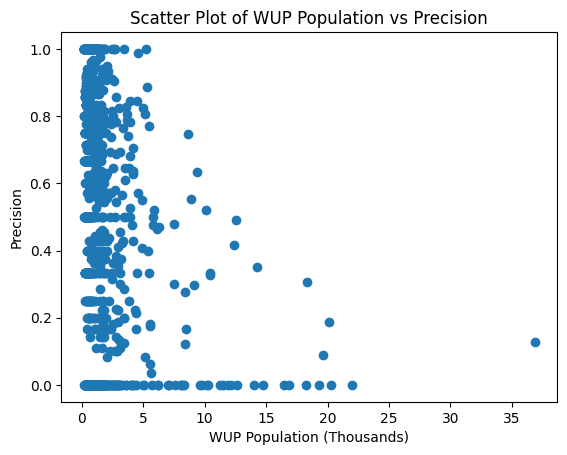

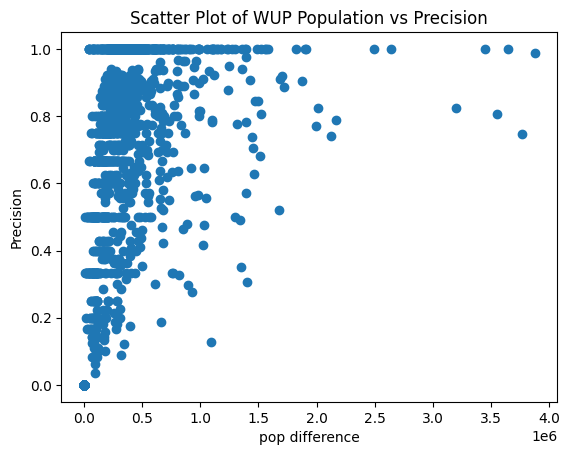

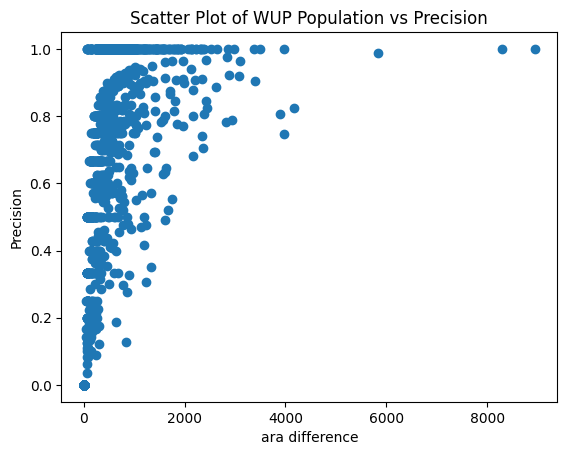

In [47]:
rate_series = pd.Series(rate_list)
popdiff_series = pd.Series(popdiff_list)
aradiff_series = pd.Series(aradiff_list)
valid_indices = rate_series != 'NA' 
valid_wup_pop = df_fifth.loc[valid_indices, 'wup_pop'] / 1e3  # 有効な wup_pop を取得
valid_rate_list = rate_series[valid_indices].astype(float)
valid_pop_list = popdiff_series[valid_indices].astype(float)
valid_ara_list = aradiff_series[valid_indices].astype(float)

plt.scatter(valid_wup_pop, valid_rate_list)
plt.xlabel("WUP Population (Thousands)")
plt.ylabel("Precision")
plt.title("Scatter Plot of WUP Population vs Precision")
plt.show()

plt.scatter(valid_pop_list, valid_rate_list)
plt.xlabel("pop difference")
plt.ylabel("Precision")
plt.title("Scatter Plot of WUP Population vs Precision")
plt.show()

plt.scatter(valid_ara_list, valid_rate_list)
plt.xlabel("ara difference")
plt.ylabel("Precision")
plt.title("Scatter Plot of WUP Population vs Precision")
plt.show()

In [50]:
savetext = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt'

def write_text(save_path, index, rate, ara_diff, pop_diff, true, gridsize):
    if index == 1:
        with open(save_path, 'w') as file:
            file.write(f"{index}|{rate}|{ara_diff}|{pop_diff}|{true}|{gridsize}\n")
    else:
        with open(save_path, 'a') as file:
            file.write(f"{index}|{rate}|{ara_diff}|{pop_diff}|{true}|{gridsize}\n")
    print(index, save_path)

for i in range(1, 1861):
    ind = i-1
    write_text(savetext, i, rate_list[ind], aradiff_list[ind], popdiff_list[ind], lower_list[ind], grid_list[ind])

1 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
2 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
3 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
4 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
5 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
6 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
7 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
8 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
9 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
10 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
11 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
12 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_pre

In [ ]:

ppp = np.ma.masked_where(msk!=city_num, pop)
aaa = np.ma.masked_where(msk!=city_num, ara)

In [19]:
average_density = []
population_above = []

for city_num in range(1, 1861):
    grid_num = np.sum(np.where(msk==city_num, 1, 0))
    if grid_num > 0:
        city_density = np.ma.masked_where(msk!=city_num, density_masked)
        valid_citydensity = city_density.compressed()
        mean_dens = np.mean(valid_citydensity)
        coord = np.where((~city_density.mask) & (city_density >= 1500))
        pop_above_1500 = np.sum(pop[coord]) # person
        
        population_above.append(pop_above_1500)
        average_density.append(mean_dens)
        print(city_num, mean_dens)
    else:
        population_above.append('NA')
        average_density.append('NA')

1 4910.778302542567
2 7521.350864760585
3 7581.473316135609
4 5815.698638099985
5 7067.970778444978
6 5583.951269033369
7 3443.8488254145223
8 16612.45206475226
9 9556.90020696771
10 7673.647109409694
11 10014.344320736052
12 3483.813911371451
13 14077.72541099052
14 6363.802424959679
15 3816.7130009754915
16 3556.0896070643375
17 3306.7242854024144
18 14963.97020553979
19 8239.742322772086
20 7086.16243295127
21 3688.3859774072484
22 5418.550683885837
23 8255.256822649928
24 7292.632762495128
25 2912.914855015497
26 13913.278482285672
27 13033.608749395666
28 2810.3336427637696
29 2512.9046226564215
30 2749.286062881559
31 1474.0733149748414
32 5721.782805047078
33 3500.257970955617
34 2664.2003666723244
35 7354.030920571943
36 6833.735719321806
37 4210.6702380087945
38 5219.927878867351
39 5194.4695285580265
40 4656.26044735513
41 4080.8902576074747
42 4305.438188243887
43 10583.137567518028
45 2583.5737939852397
46 12128.721559714852
47 10974.514907090674
48 3044.119426062115
49 389

In [40]:
recalculated = []

for city_num in range(1, 1861):
    grid_num = np.sum(np.where(msk==city_num, 1, 0))
    if grid_num > 0:
        city_density = np.ma.masked_where(msk!=city_num, density_masked)
        ppp = np.ma.masked_where(msk!=city_num, pop).compressed()
        aaa = np.ma.masked_where(msk!=city_num, ara).compressed()
        mask = aaa != 1e20  # 1e20以外の要素を選択
        nonmask_mean = np.mean(aaa[mask])  # マスクされた要素の平均
        aaa = np.where(aaa == 1e20, nonmask_mean, aaa)  # 1e20を平均値に置き換える
        mean_dens = np.sum(ppp)/(np.sum(aaa)/10**6)
        recalculated.append(mean_dens)
        print(city_num, mean_dens)
    else:
        recalculated.append('NA')
        average_density.append('NA')

1 4910.886573449277
2 7519.540752433169
3 7580.314592638948
4 5817.400582539291
5 7067.521503845837
6 5584.6069924953335
7 3444.0599232848163
8 15337.340845050867
9 9560.526313611952
10 7674.946104644568
11 10017.842301575723
12 3483.33414629467
13 14080.487593879463
14 6366.181934171182
15 3817.9409105509176
16 3555.039642021394
17 3306.600315559389
18 14964.124290508667
19 8236.27379203538
20 7085.829498389542
21 3687.9150795240525
22 5418.764789167565
23 8253.591591307473
24 7293.485419482629
25 2911.777023768919
26 13912.654487479402
27 13033.645413886252
28 2810.5776947422864
29 2512.972783730194
30 2748.8766848971522
31 1473.7057596843133
32 5722.01882880902
33 3500.040382537344
34 2664.279449034396
35 7354.128589163121
36 6833.373077551579
37 4210.5705928903635
38 5219.635036737062
39 5194.873651604182
40 4656.919504164808
41 4080.2182707437046
42 4305.358688119033
43 10585.573267573152
45 2584.3583395748205
46 12128.54989582758
47 10974.60507113626
48 3044.5840927751924
49 3891

In [45]:
import pandas as pd

text_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_fifth.txt'
columns = ['city_code', 'rank', 'status', 'type', 'latitude', 'longitude', 'city_name', 'wup_pop', '5region_code', '5region_name', '17region_code', '17region_name', '22region_code', '22region_name', 'country_code', 'country_name', 'full_pop', 'clustered_pop', 'grids', 'administrative_level', 'input_size', 'Mcdonald2014', 'mainriver_count', 'distance', 'precision']
df_fifth = pd.read_csv(text_path, sep="|", header=None, names=columns)
df_fifth['population_density'] = pd.to_numeric(recalculated, errors='coerce')

# グループ化して中央値とサンプルサイズを計算

grouped = df_fifth.groupby('22region_name')['population_density'].agg(
    median_diff=('mean'),  # 中央値を計算
    sample_size=('size')      # グループのサイズを計算
).reset_index()

# 並べ替え用のカテゴリを設定
desired_order = ['Northern America', 'Central America', 'Caribbean', 'South America',
                 'Northern Europe', 'Western Europe', 'Southern Europe', 'Eastern Europe',
                 'Northern Africa', 'Western Africa', 'Middle Africa', 'Southern Africa', 'Eastern Africa', 
                 'Central Asia', 'Western Asia', 'Southern Asia', 'South-eastern Asia', 'Eastern Asia',
                 'Australia and New Zealand', 'Melanesia']

# '22region_name'列をカテゴリ型にして並べ替え
grouped['22region_name'] = pd.Categorical(
    grouped['22region_name'], 
    categories=desired_order, 
    ordered=True
)
grouped = grouped.sort_values('22region_name')

print(grouped)

                22region_name  median_diff  sample_size
10           Northern America   782.698871          161
2             Central America  1766.548612           63
1                   Caribbean  2052.462554           10
12              South America  1442.116912          137
11            Northern Europe  1595.108077           39
19             Western Europe  1529.672814           58
16            Southern Europe  1547.398647           55
6              Eastern Europe  1314.310914          108
9             Northern Africa  2760.361155           44
17             Western Africa  1613.649274           76
8               Middle Africa  1963.133186           38
14            Southern Africa  1583.855304           16
4              Eastern Africa  1871.167384           47
3                Central Asia  2568.017076           17
18               Western Asia  1463.918991          106
15              Southern Asia  2116.863727          252
13         South-eastern Asia  2526.330056      

In [44]:
numbers = [x for x in recalculated if isinstance(x, (int, float))]
print(len(numbers))
average = np.mean(numbers)
print(average)

1604
1750.4976701848313
